## Multivariable linear regression of human case predicters

Simple linear and multilinear regressions for possible human case predicters of human brucellosis. 
Covaraites of interest are livestock interaction history, livestock vaccination history, provincal socioeconomic status, and population setting. 

Livestock interaction is a primary way brucellosis spreads from animals to humans, so it is likely a strong factor in determining disease. Vaccination status is especially of intrest as in theory if the vaccination program is successful, vaccination status should be protective. However, vaccination strains of the virus can shed to infect humans. Provincial ses is based on a study of iranian disabilities, and was guaged on a scale of 1-5 (1 = lowest SES, while 5 = highest). We expect areas wtih higher ses to have lower incidence of infectious diseaese, so we expect high ses to be protective against brucelleosis. Finally, population setting is assessed to see if population setting makes a difference. Rural = -1, Urban = 1, Null/unknown/nomadic/iterant = 0. We expect rural populations to be at higher risk, and therefore urban settings to be protective. 


In [67]:


import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import statsmodels.api as sm
from scipy import stats

In [68]:
#this dataframe has been adjusted to convert the strings of the covariates of interest into integer values for regerssion analysis

kydf = pd.read_csv('Katharine_data.csv')
kydf

,Unnamed: 0,county_en,province_en,Livestock_int_hist,Livestock_vac_hist,Pop_setting,count,county_count,Population,inf_rate,ses,inf_rate_100k
0,0,Abadan,Khuzestan,-1,-1,1,2,8,298090,0.000007,1,0.671
1,1,Abadan,Khuzestan,-1,0,1,1,8,298090,0.000003,1,0.335
2,2,Abadan,Khuzestan,0,0,1,1,8,298090,0.000003,1,0.335
3,3,Abadan,Khuzestan,1,-1,-1,3,8,298090,0.000010,1,1.010
4,4,Abadan,Khuzestan,1,-1,1,1,8,298090,0.000003,1,0.335
...,...,...,...,...,...,...,...,...,...,...,...,...
4524,4524,Zirkouh,South Khorasan,0,1,-1,1,226,40155,0.000025,1,2.490
4525,4525,Zirkouh,South Khorasan,0,1,1,2,226,40155,0.000050,1,4.980
4526,4526,Zirkouh,South Khorasan,1,1,0,1,226,40155,0.000025,1,2.490
4527,4527,Zirkouh,South Khorasan,1,1,-1,132,226,40155,0.003287,1,329.000


In [69]:


X = kydf[['Livestock_int_hist', 'Livestock_vac_hist', 'Pop_setting', 'ses']]
y = kydf['inf_rate_100k']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #split data into test and train points

regressor = LinearRegression()  #linear regression model from sci-kit learn
regressor.fit(X, y)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])   
coeff_df #print coefficient data frame 



,Coefficient
Livestock_int_hist,7.564898
Livestock_vac_hist,2.572191
Pop_setting,-7.454514
ses,-1.245824


### Coefficient interpretation

Livestock interaction history is positively correlated to incidence rate/100k which is expected. Working with animals is likely to promote exposure to brucellosis. 

Likewise, population setting in urban vs rural is protective against brucellosis, so urban environments are less likely to have high incidence rates. 

SES is also protective against bruellosis as expected. Living in a province with high socioeconomic status compared to a lower socioeconomic status is correlated with a lower likelihood of disease. 

Most interesting of all though, is that vaccination status is more highly correlated with incidence rate. This could be due to confounding where the larger the animal population is, the more contact there is, and the more likely they are to be vaccinated. However, it could also be caused by human infection by the RB-51 vaccine strain. This has been well documented in US cases of brucellosis. To further examine this, data would need to be collected on typing of human cases. 

In [70]:
#This cell is an alternative way to calculate linear regression. This module by statsmodel also provides p values for each coefficient. All coefficients are significant, however the predictive power is low

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:          inf_rate_100k   R-squared (uncentered):                   0.150
Model:                            OLS   Adj. R-squared (uncentered):              0.149
Method:                 Least Squares   F-statistic:                              199.1
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                   1.81e-157
Time:                        13:17:46   Log-Likelihood:                         -22915.
No. Observations:                4529   AIC:                                  4.584e+04
Df Residuals:                    4525   BIC:                                  4.586e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [71]:
#This cell compares actual vs predicted infection values based on the multivariate linear regression 

y_pred = regressor.predict(X_test)

kydf2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
kydf2



,Actual,Predicted
1275,0.4000,-1.227366
1898,2.2700,13.672250
2777,0.8820,16.244441
4014,23.3000,-6.220073
1644,0.2870,23.919723
...,...,...
1936,2.5800,6.116764
4032,0.0535,2.590648
3259,6.7900,26.390943
2889,0.7720,28.802046


### To visualize the comparison of predicted vs actual infection rates, the infection rates are graphed below.

A key problem is that the model allows for negative rates of infection. In reality though, the infection rates should be a minimum of 0. It also prints the mean absolute error, mean sq error, and root mean sq error. All of which support that while the coefficients are significant, they have an overall low predictive power. 


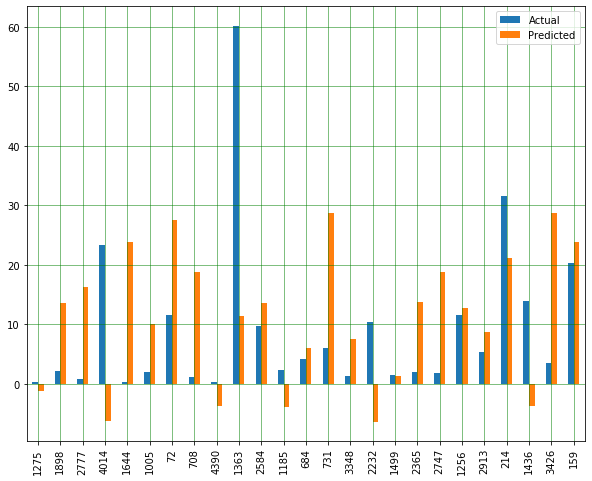

Mean Absolute Error: 16.796386018879208
Mean Squared Error: 1067.9096909747573
Root Mean Squared Error: 32.67888754187874


In [72]:
df1 = kydf2.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## To assess the relationships betwee covariates and infection rates, individual single variable linear regressions are shown below. 

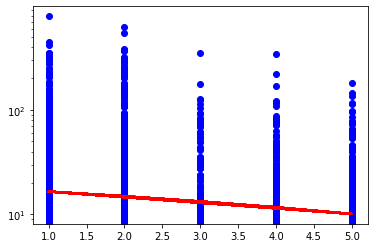

In [73]:
#SES vs Infection 

x = kydf['ses'].values.reshape(-1,1)
y = kydf['inf_rate_100k'].values.reshape(-1,1)

linear_regression = LinearRegression()
linear_regression.fit(x,y)

y_pred = linear_regression.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.yscale('log')
plt.show()

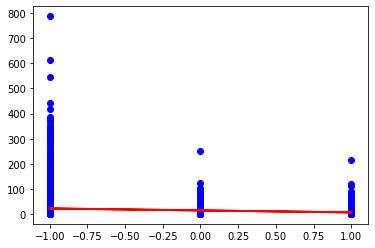

In [74]:
#Rural vs Unknown vs Urban 
''' This is particularily interesting as it shows that the majority of counties with cases over 100/100,000 were rural counties
    The outliers in the urban represent important high risk counties since they have higher incidence relative to the other urban counties. '''


x = kydf['Pop_setting'].values.reshape(-1,1)
y = kydf['inf_rate_100k'].values.reshape(-1,1)

linear_regression = LinearRegression()
linear_regression.fit(x,y)

y_pred = linear_regression.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
#plt.yscale('log')
plt.show()

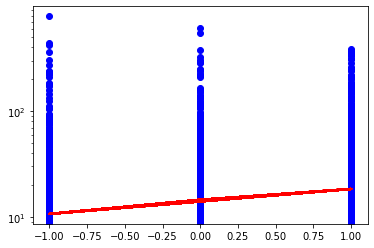

In [75]:
#If vaccination is protective for human cases, we would expect an opposite trend. 
#However, despite this trend the vaccination and surveillance program seems to be working because the overall case rates have decreased over time
#This could be due to decrease in consumption of unpasteurized dairy, or due to success of vaccination
#this trend does support that some cases of human brucellosis are vaccine acquired 
#more research necessary to test this hypothesis

x = kydf['Livestock_vac_hist'].values.reshape(-1,1)
y = kydf['inf_rate_100k'].values.reshape(-1,1)

linear_regression = LinearRegression()
linear_regression.fit(x,y)

y_pred = linear_regression.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.yscale('log')
plt.show()

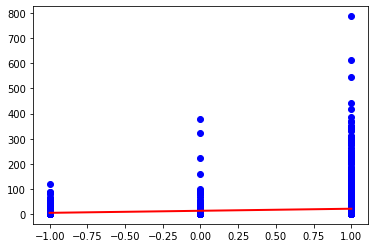

In [76]:
x = kydf['Livestock_int_hist'].values.reshape(-1,1)
y = kydf['inf_rate_100k'].values.reshape(-1,1)

linear_regression = LinearRegression()
linear_regression.fit(x,y)

y_pred = linear_regression.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [78]:
df

,Unnamed: 0,county_en,province_en,Livestock_int_hist,Livestock_vac_hist,Pop_setting,count,county_count,Population,inf_rate,ses,inf_rate_100k
0,0,Abadan,Khuzestan,-1,-1,1,2,8,298090,0.000007,1,0.671
1,1,Abadan,Khuzestan,-1,0,1,1,8,298090,0.000003,1,0.335
2,2,Abadan,Khuzestan,0,0,1,1,8,298090,0.000003,1,0.335
3,3,Abadan,Khuzestan,1,-1,-1,3,8,298090,0.000010,1,1.010
4,4,Abadan,Khuzestan,1,-1,1,1,8,298090,0.000003,1,0.335
...,...,...,...,...,...,...,...,...,...,...,...,...
4524,4524,Zirkouh,South Khorasan,0,1,-1,1,226,40155,0.000025,1,2.490
4525,4525,Zirkouh,South Khorasan,0,1,1,2,226,40155,0.000050,1,4.980
4526,4526,Zirkouh,South Khorasan,1,1,0,1,226,40155,0.000025,1,2.490
4527,4527,Zirkouh,South Khorasan,1,1,-1,132,226,40155,0.003287,1,329.000


### So this isn't super importrant coding but it is interesting from a biological perspective, as is the histogram below. 

Basically, we have the average infection rate for Iran of 14.45. This is cool because for the last reported studies this suggests that the average cases/100k is decreasing.
1991 - 2008: mean of 43.24
2001-2009: mean of 29.83

our data encompasses 2009-2018 I believe, please feel free to correct me, with a lower rate per 100k. 


The histogram is also interesting because it suggestst that a few highly epidemic areas are responsible for such high cases/100k rate, which is supported by the Moran's I maps. 

Also weird: despite having large coefficients, multivariable linear regression has very poor predictive power. Suggests there could be other confounders of interest. 



In [79]:
df["inf_rate_100k"].mean()

14.449345484654447

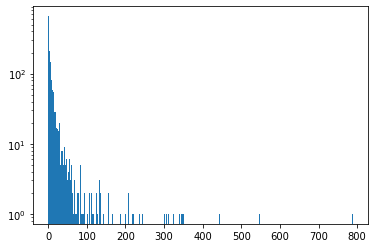

In [80]:
x = df['inf_rate_100k']
plt.hist(x, bins = 1000)
plt.yscale('log')
plt.show()

In [81]:
#These are tanner's functions I copied and pasted into my notebooks, just to compare his regression models vs mine.
#this cell should be redundent

def regress(df, attribute, labels):
    """
    Generates and plots regressions for multiple variables in a dataframe.
    Attribute is the dependent, labels are the independent.
    Returns a dataframe with intercepts, coefficients, rmse and r2 for each regression.
    """
    #Storage variables
    fig, axs=plt.subplots(nrows=2, ncols=2)
    intercepts=[]
    coefs=[]
    rmses=[]
    r2s=[]
    df=df.dropna()

    for i, label in enumerate(labels): #iterate over each indpt. variable
        #split data into training and testing, 80:20 ratio
        x_train, x_test, y_train, y_test = train_test_split(df[label].values.reshape(-1,1), df[attribute].values.reshape(-1,1), test_size=0.2, random_state=0)

        #create the linear regression for current var
        reg=LinearRegression().fit(x_train, y_train)

        #Get intercept, coefficient, rmse, and r2 for current var
        intercept=reg.intercept_
        coef=reg.coef_
        y_pred = reg.predict(x_test)
        rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        r2=metrics.r2_score(y_test, y_pred)

        #add to the storage lists
        intercepts.append(float(intercept))
        coefs.append(float(coef))
        rmses.append(float(rmse))
        r2s.append(float(r2))

        #Plot both scatter and regression line on same subplot
        plt.sca(axs[i%2, int(i/2)]) #sets the correct subplot
        axs[i%2, int(i/2)].set(xlabel=label, ylabel=attribute)
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, color='red', linewidth=2)
    plt.show()
    #Puts it all together and returns
    return pd.DataFrame({'coefficient':coefs, 'intercept':intercepts, 'RMSE':rmses, 'R2':r2s}, index=labels)


def mvRegress(df, attribute, labels):
    """
    Generates a multivariable regression. Attribute is dependent, labels are independent.
    Prints intercept, RMSE, and R2. Returns a dataframe with coefficients.
    """
    df=df.dropna()

    #separates into training and testing 80:20 ratio, fits regression
    x=df[labels]
    x_train, x_test, y_train, y_test = train_test_split(x, df[attribute].values.reshape(-1,1), test_size=0.2, random_state=0)
    reg=LinearRegression().fit(x_train, y_train)

    y_pred = reg.predict(x_test) #predicts values with new regression
    #calculate errors between predicted and actual
    rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2=metrics.r2_score(y_test, y_pred)

    print('Intercept: ', float(reg.intercept_))
    print('RMSE: ', rmse)
    print('R2: ', r2, '\n')

    #Returns coefficient dataframe instead of printing
    return pd.DataFrame(reg.coef_.flatten(), x.columns, columns=['coefficient'])



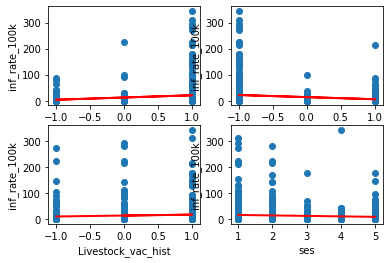

Intercept:  15.536809721794013
RMSE:  32.71975603953287
R2:  0.06626402731861802 



In [60]:
#Tanner's linear regression code applied to this data, same as above, just more condensed. 

human_single_cases=regress(df, 'inf_rate_100k', ['Livestock_int_hist', 'Livestock_vac_hist', 'Pop_setting', 'ses'])
human_MV_cases=mvRegress(df, 'inf_rate_100k', ['Livestock_int_hist', 'Livestock_vac_hist', 'Pop_setting', 'ses'])